## Numerical Identity Features
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(f'np=={np.__version__}')
print(f'pd=={pd.__version__}')
print(f'sns=={sns.__version__}')

np==1.26.4
pd==2.2.0
sns==0.13.2


#### Numerical Features
---
* TransactionID
* id_01 - id_11


In [3]:
num_features = [
    'TransactionID',    # Unique identifier
    'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
    'id_07', 'id_08', 'id_09', 'id_10', 'id_11'
]
len(num_features)

12

In [4]:
# test_idemtity = pd.read_csv('/Users/oskarwallberg/desktop/kaggle-datasets/ieee-fraud-detection/test_identity.csv')
# print(test_identity.shape)
train_identity = pd.read_csv('/Users/oskarwallberg/desktop/kaggle-datasets/ieee-fraud-detection/train_identity.csv')
train_num = train_identity[num_features].copy()
train_num.shape

(144233, 12)

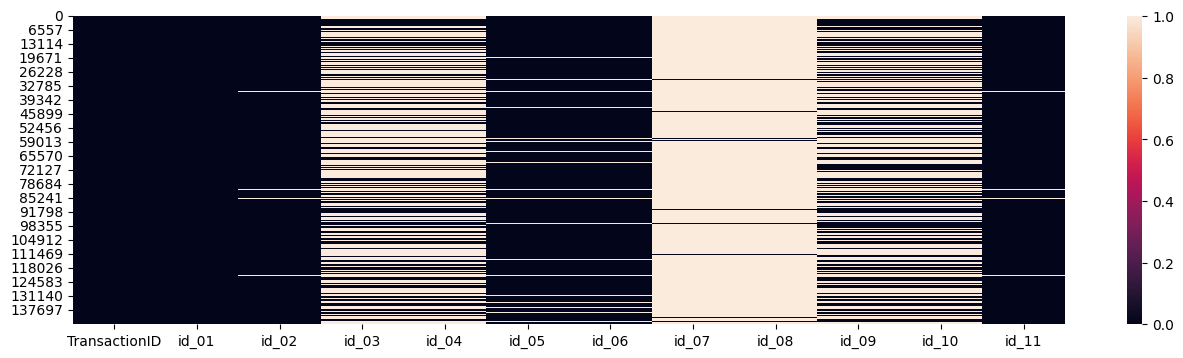

In [7]:
plt.figure(figsize=(16, 4))
sns.heatmap(train_num.isna())
plt.show()

//NOTE: Numerical identity features with similar NaNs. 
- id_02 - id_11
- id_03 - id_04
- id_05 - id_06
- id_07 - id_08
- id_09 - id_10
- id_01 ? 

In [14]:
# Same number of NaNs between above noted features as well.
train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 13.2 MB


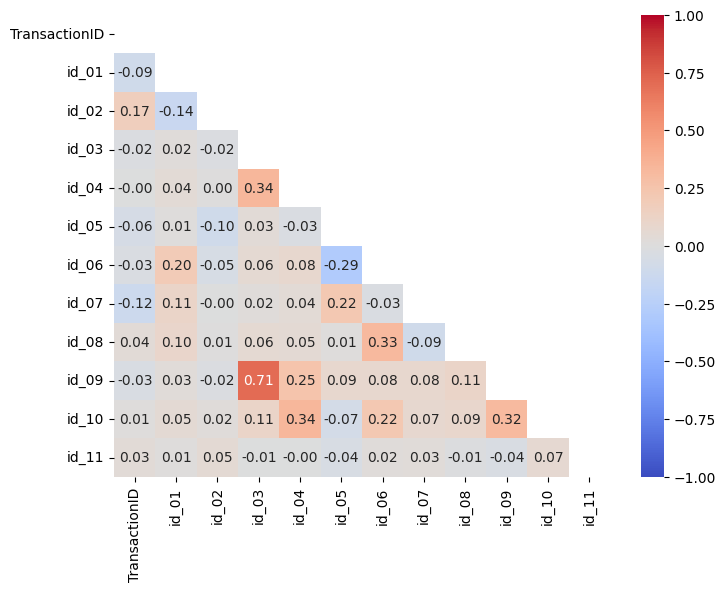

In [13]:
# correlation between numerical identity features
corr_num = train_num.corr()
mask = np.zeros_like(corr_num, dtype=bool)
triu_idx = np.triu_indices_from(mask)
mask[triu_idx] = True

plt.figure(figsize=(8, 6))
sns.heatmap(data=corr_num, mask=mask, vmin=-1, center=0, vmax=1, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

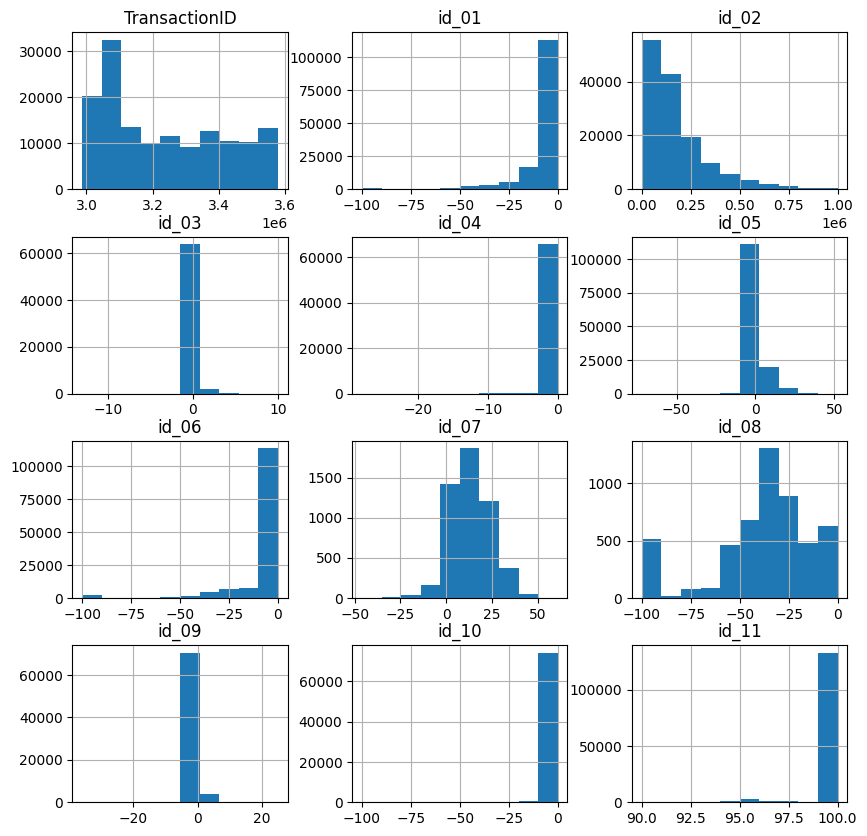

In [21]:
train_num.hist(figsize=(10, 10))
plt.show()

Potentially log-scale skewed features (log1p). Absolute value of values with right skew (negative -> positive)

In [22]:
train_num.describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionID,144233.0,3.236329e+06,178849.571186,2987004.0,3077142.0,3198818.0,3392923.0,3577534.0
id_01,144233.0,-1.017050e+01,14.347949,-100.0,-10.0,-5.0,-5.0,0.0
id_02,140872.0,1.747166e+05,159651.816856,1.0,67992.0,125800.5,228749.0,999595.0
id_03,66324.0,6.018937e-02,0.598231,-13.0,0.0,0.0,0.0,10.0
id_04,66324.0,-5.893794e-02,0.701015,-28.0,0.0,0.0,0.0,0.0
id_05,136865.0,1.615585e+00,5.249856,-72.0,0.0,0.0,1.0,52.0
id_06,136865.0,-6.698710e+00,16.491104,-100.0,-6.0,0.0,0.0,0.0
id_07,5155.0,1.328535e+01,11.384207,-46.0,5.0,14.0,22.0,61.0
id_08,5155.0,-3.860039e+01,26.084899,-100.0,-48.0,-34.0,-23.0,0.0
id_09,74926.0,9.102314e-02,0.983842,-36.0,0.0,0.0,0.0,25.0


In [25]:
# Fully populated by UIDs
train_num['TransactionID'].nunique() == train_num.shape[0]

True